# Estimated and observed closest strains per timepoint

Create a figure similar to Figure 2D in Neher et al. 2014 showing the minimum estimated distance to the future and minimum observed distance to the future per timepoint.

In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [35]:
sns.set_style("white")
plt.style.use("huddlej")

In [36]:
mpl.rcParams['savefig.dpi'] = 200
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['font.weight'] = 300
mpl.rcParams['axes.labelweight'] = 300
mpl.rcParams['font.size'] = 18

In [55]:
df = pd.read_csv(
    "../results/builds/natural/natural_sample_1_with_10_vpm/natural_sample_1_with_10_vpm_combined_forecast.tsv",
    sep="\t"
)

In [56]:
df.head()

,timepoint,strain,frequency,weighted_distance_to_present,weighted_distance_to_future,fitness,projected_frequency,y,weighted_distance_to_future_by_lbi-ep_x-ne_star
0,1995-10-01,A/England/121/1995,0.003272,12.032436,20.295712,-2.346761,0.000179,6.888254,6.888254
1,1995-10-01,A/England/255/1995,0.005768,8.104340,11.708415,2.429497,0.037422,9.394077,9.394077
2,1995-10-01,A/England/258/1995,0.044474,12.205185,19.948286,-3.316112,0.000922,7.111886,7.111886
3,1995-10-01,A/England/263/1995,0.053012,10.012433,19.970790,2.247867,0.286810,3.709756,3.709756
4,1995-10-01,A/England/268/1995,0.069978,9.664147,19.970790,-0.433058,0.025934,4.255451,4.255451


In [57]:
mean_distance_to_future_df = df.groupby("timepoint")["weighted_distance_to_future"].mean().reset_index()
mean_distance_to_future_df.head()

,timepoint,weighted_distance_to_future
0,1995-10-01,17.527181
1,1996-04-01,12.186350
2,1996-10-01,13.608199
3,1997-04-01,11.160614
4,1997-10-01,12.864724


In [58]:
# Find the minimum weighted distance to the future.
minimum_distance_to_future_df = df.groupby("timepoint")["weighted_distance_to_future"].min().reset_index()
minimum_distance_to_future_df.head()

,timepoint,weighted_distance_to_future
0,1995-10-01,6.342883
1,1996-04-01,7.363674
2,1996-10-01,9.443538
3,1997-04-01,6.920693
4,1997-10-01,5.899324


In [59]:
estimated_distance_to_future_df = df.sort_values(
    ["timepoint", "fitness"],
    ascending=False
).groupby("timepoint")["weighted_distance_to_future"].first().reset_index()
estimated_distance_to_future_df.head()

,timepoint,weighted_distance_to_future
0,1995-10-01,18.970790
1,1996-04-01,9.226843
2,1996-10-01,11.437546
3,1997-04-01,10.130231
4,1997-10-01,14.875581


In [60]:
distance_df = mean_distance_to_future_df.merge(
    minimum_distance_to_future_df,
    on="timepoint",
    suffixes=["_mean", "_observed"]
).merge(
    estimated_distance_to_future_df,
    on="timepoint"
)
distance_df.head()

,timepoint,weighted_distance_to_future_mean,weighted_distance_to_future_observed,weighted_distance_to_future
0,1995-10-01,17.527181,6.342883,18.970790
1,1996-04-01,12.186350,7.363674,9.226843
2,1996-10-01,13.608199,9.443538,11.437546
3,1997-04-01,11.160614,6.920693,10.130231
4,1997-10-01,12.864724,5.899324,14.875581


In [61]:
distance_df["distance_predicted"] = distance_df["weighted_distance_to_future"] / distance_df["weighted_distance_to_future_mean"]
distance_df["distance_minimum"] = distance_df["weighted_distance_to_future_observed"] / distance_df["weighted_distance_to_future_mean"]
distance_df.head()

,timepoint,weighted_distance_to_future_mean,weighted_distance_to_future_observed,weighted_distance_to_future,distance_predicted,distance_minimum
0,1995-10-01,17.527181,6.342883,18.970790,1.082364,0.361888
1,1996-04-01,12.186350,7.363674,9.226843,0.757146,0.604256
2,1996-10-01,13.608199,9.443538,11.437546,0.840489,0.693959
3,1997-04-01,11.160614,6.920693,10.130231,0.907677,0.620100
4,1997-10-01,12.864724,5.899324,14.875581,1.156308,0.458566


Text(0,0.5,'$\\Delta$(prediction)')

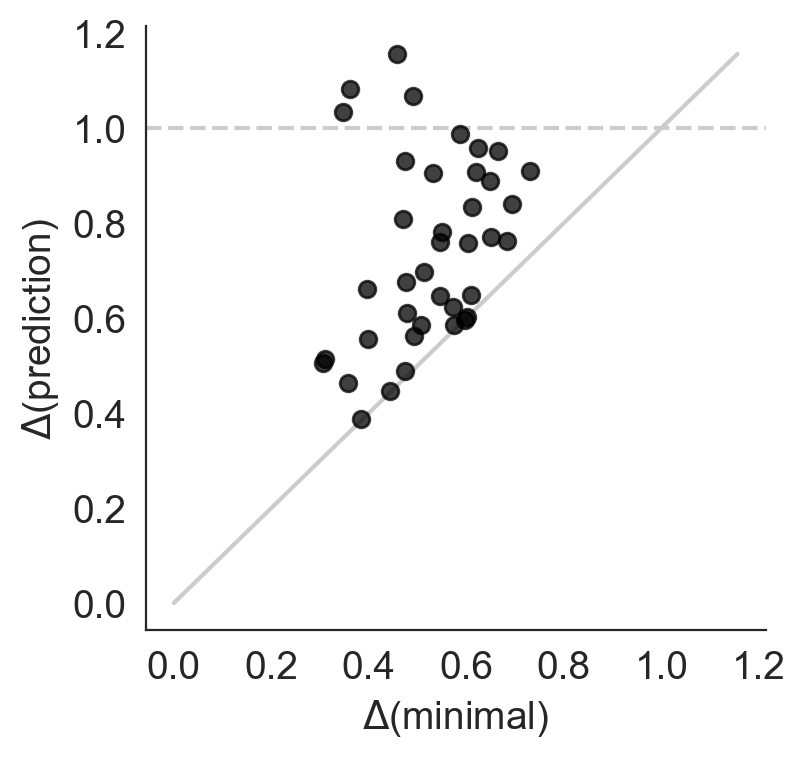

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

max_distance = max(distance_df["distance_predicted"].max(), distance_df["distance_minimum"].max())
line = np.linspace(
    0,
    max_distance,
    10
)
ax.plot(line, line, color="#cccccc")
ax.axhline(y=1, color="#cccccc", linestyle="--")
ax.plot(
    distance_df["distance_minimum"],
    distance_df["distance_predicted"],
    "o",
    color="#000000",
    alpha=0.75
)

ticks = np.arange(0, max_distance + 0.2, 0.2)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xlabel("$\Delta$(minimal)")
ax.set_ylabel("$\Delta$(prediction)")